In [49]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
taxi13_df = pd.read_csv("LagData/2013lag.csv", sep = ",")
taxi14_df = pd.read_csv("LagData/2014lag.csv", sep = ",")
taxi15_df = pd.read_csv("LagData/2015lag.csv", sep = ",")
taxi16_df = pd.read_csv("LagData/2016lag.csv", sep = ",")

y13_df = pd.DataFrame(taxi13_df['Count'])
X13_raw_df = taxi13_df.drop(columns = ['Pickup Community Area', 'Count','Trip Start Timestamp'])

y14_df = pd.DataFrame(taxi14_df['Count'])
X14_raw_df = taxi14_df.drop(columns = ['Pickup Community Area', 'Count','Trip Start Timestamp'])

y15_df = pd.DataFrame(taxi15_df['Count'])
X15_raw_df = taxi15_df.drop(columns = ['Pickup Community Area', 'Count','Trip Start Timestamp'])

y16_df = pd.DataFrame(taxi16_df['Count'])
X16_raw_df = taxi16_df.drop(columns = ['Pickup Community Area', 'Count','Trip Start Timestamp'])

weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])


#13
enc.fit(X13_raw_df.weekday.values.reshape(-1, 1))
encoded = enc.transform(X13_raw_df.weekday.values.reshape(-1, 1))
encoded13_df = pd.DataFrame(encoded.toarray().astype(int))\
             .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

#14
enc.fit(X14_raw_df.weekday.values.reshape(-1, 1))
encoded = enc.transform(X14_raw_df.weekday.values.reshape(-1, 1))
encoded14_df = pd.DataFrame(encoded.toarray().astype(int))\
             .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

#15
enc.fit(X15_raw_df.weekday.values.reshape(-1, 1))
encoded = enc.transform(X15_raw_df.weekday.values.reshape(-1, 1))
encoded15_df = pd.DataFrame(encoded.toarray().astype(int))\
             .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})
    
#16
enc.fit(X16_raw_df.weekday.values.reshape(-1, 1))
encoded = enc.transform(X16_raw_df.weekday.values.reshape(-1, 1))
encoded16_df = pd.DataFrame(encoded.toarray().astype(int))\
             .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

X13_encode_df = pd.concat([X13_raw_df.drop(columns=['weekday']), encoded13_df], axis=1) 

X14_encode_df = pd.concat([X14_raw_df.drop(columns=['weekday']), encoded14_df], axis=1) 

X15_encode_df = pd.concat([X15_raw_df.drop(columns=['weekday']), encoded15_df], axis=1) 

X16_encode_df = pd.concat([X16_raw_df.drop(columns=['weekday']), encoded16_df], axis=1) 

# 13
X13_encode_df['lat_sq'] = round(X13_encode_df.lat.pow(2),4)
X13_encode_df['lon_sq'] = round(X13_encode_df.lon.pow(2),4)
X13_encode_df['latXlon'] = X13_encode_df.lat*X13_encode_df.lon
# 14
X14_encode_df['lat_sq'] = round(X14_encode_df.lat.pow(2),4)
X14_encode_df['lon_sq'] = round(X14_encode_df.lon.pow(2),4)
X14_encode_df['latXlon'] = X14_encode_df.lat*X14_encode_df.lon
# 15
X15_encode_df['lat_sq'] = round(X15_encode_df.lat.pow(2),4)
X15_encode_df['lon_sq'] = round(X15_encode_df.lon.pow(2),4)
X15_encode_df['latXlon'] = X15_encode_df.lat*X15_encode_df.lon
# 16
X16_encode_df['lat_sq'] = round(X16_encode_df.lat.pow(2),4)
X16_encode_df['lon_sq'] = round(X16_encode_df.lon.pow(2),4)
X16_encode_df['latXlon'] = X16_encode_df.lat*X16_encode_df.lon

#with_count_df_16 = X16_encode_df
#with_count_df_16['Count'] = y16_df['Count']


In [56]:

with_count_df_16.head()

,dayofyear,dayofyear_sin,dayofyear_cos,hour,hour_sin,hour_cos,lat,lon,temperature,wind_speed,...,Tuesday,Wedneseday,Thursday,Friday,Saturday,Sunday,lat_sq,lon_sq,latXlon,Count
0,0.562,-0.984,0.179,-0.3,0.87,-0.5,2.1,-0.3,0.55,0.42,...,1,0,0,0,0,0,4.41,0.09,-0.63,5
1,0.562,-0.984,0.179,-0.3,0.87,-0.5,2.0,-0.1,0.55,0.42,...,1,0,0,0,0,0,4.00,0.01,-0.20,6
2,0.562,-0.984,0.179,-0.3,0.87,-0.5,1.7,-0.4,0.55,0.42,...,1,0,0,0,0,0,2.89,0.16,-0.68,38
3,0.562,-0.984,0.179,-0.3,0.87,-0.5,1.7,-0.1,0.55,0.42,...,1,0,0,0,0,0,2.89,0.01,-0.17,3
4,0.562,-0.984,0.179,-0.3,0.87,-0.5,1.5,-0.2,0.55,0.42,...,1,0,0,0,0,0,2.25,0.04,-0.30,6


--------------- Correlation Matrix ---------------


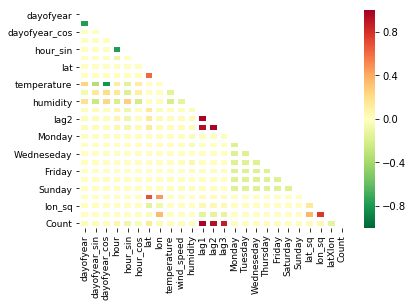

In [57]:
corr_df = with_count_df_16.corr()

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
print("--------------- Correlation Matrix ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html

seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1 ,mask = mask,  linewidths=3,fmt='.1f')
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0,fontsize=9) 
plt.xticks(rotation=90,fontsize =9) 
plt.show()

In [67]:
X13_mat = X13_encode_df.values
y13_mat = y13_df.values
X14_mat = X14_encode_df.values
y14_mat = y14_df.values
X15_mat = X15_encode_df.values
y15_mat = y15_df.values
X16_mat = X16_encode_df.values
y16_mat = y16_df.values

In [62]:
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

estimators = 100
cv_errs = []
train_errs = []

for features in [5,10,15,20,None]:
    for depths in [5,10,15,20,None]:
        regr = RandomForestRegressor(max_features = features, max_depth = depths, random_state=0, n_estimators= estimators)
        # Cross Validation
        regr.fit(X13_mat, y13_mat)
        regr_pred13 = regr.predict(X13_mat)
        regr_pred14 = regr.predict(X14_mat)
        print("max_features:", features)
        print("max_depth:",depths)
        print("training error:", mean_squared_error(y_true = y13_mat, y_pred = regr_pred13))
        print("cv error:", mean_squared_error(y_true = y14_mat, y_pred = regr_pred14))
        
        regr.fit(X14_mat, y14_mat)
        regr_pred14 = regr.predict(X14_mat)
        regr_pred15 = regr.predict(X15_mat)
        print("training error:", mean_squared_error(y_true = y14_mat, y_pred = regr_pred14))
        print("cv error:", mean_squared_error(y_true = y15_mat, y_pred = regr_pred15))


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 5
max_depth: 5
training error: 1140.8136094893302
cv error: 2041.848810820093


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 1465.5598111731126
cv error: 1111.5190658124745


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 5
max_depth: 10
training error: 244.15074062503842
cv error: 584.3770092368239


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 300.6550571480292
cv error: 327.4991190413524


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 5
max_depth: 15
training error: 79.24245163867062
cv error: 400.2382593795409


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 105.40397938448676
cv error: 241.26387748858443


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 5
max_depth: 20
training error: 33.45116332452301
cv error: 381.2888926938231


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 43.07000150913149
cv error: 230.09476312390797


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 5
max_depth: None
training error: 23.98648908683285
cv error: 390.1632042505341


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 29.15416104230695
cv error: 229.72460290282933


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 10
max_depth: 5
training error: 590.079988618137
cv error: 966.8279330715316


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 766.5815354891047
cv error: 621.133473328291


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 10
max_depth: 10
training error: 182.3360698559443
cv error: 374.1888158399912


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 227.397737366809
cv error: 271.8151163531458


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 10
max_depth: 15
training error: 66.8594258125456
cv error: 316.16175384929363


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 84.47612847287121
cv error: 224.3973035637285


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 10
max_depth: 20
training error: 31.415624783083608
cv error: 312.5742742334164


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 39.327296038309484
cv error: 220.6077631511355


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 10
max_depth: None
training error: 24.11925306284861
cv error: 307.9037250539375


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 29.481230557577653
cv error: 221.1956178189928


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 15
max_depth: 5
training error: 509.0151921975996
cv error: 792.4288656325757


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 636.3038238145359
cv error: 536.2148479125776


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 15
max_depth: 10
training error: 177.14363298704345
cv error: 355.40787396343495


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 223.15472816338504
cv error: 272.37307477914135


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 15
max_depth: 15
training error: 66.49224932736666
cv error: 310.2304634342273


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 85.71886061962296
cv error: 232.06521617131378


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 15
max_depth: 20
training error: 33.04675811185677
cv error: 305.61426730388496


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 41.390670622913255
cv error: 227.82099144611016


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 15
max_depth: None
training error: 25.173465529192185
cv error: 308.3851807909645


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 30.66142407591252
cv error: 227.62903141821383


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 20
max_depth: 5
training error: 518.266920575251
cv error: 769.5314326427664


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 643.0684120759287
cv error: 553.7887344549417


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 20
max_depth: 10
training error: 181.91751189426745
cv error: 363.42510629425016


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 229.74393387270607
cv error: 282.39696511117734


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 20
max_depth: 15
training error: 68.7929476692095
cv error: 321.55658607183153


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 87.96751247608957
cv error: 240.05867421505332


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 20
max_depth: 20
training error: 34.40698743226309
cv error: 318.97060580756596


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 43.785198641197724
cv error: 234.39759308894196


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: 20
max_depth: None
training error: 26.0002748908559
cv error: 317.820494875072


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 31.82728155410632
cv error: 234.03862455971472


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: None
max_depth: 5
training error: 572.8348327801996
cv error: 839.1387494843638


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 707.1192906490547
cv error: 615.5594579422186


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: None
max_depth: 10
training error: 187.00831374744246
cv error: 377.6738996372788


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 235.87245036820713
cv error: 291.1718433668808


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: None
max_depth: 15
training error: 70.47869897790824
cv error: 331.50562992030564


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 90.14072850690681
cv error: 245.52003550164255


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: None
max_depth: 20
training error: 35.43686784842705
cv error: 327.16854283977716


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 44.89735132147444
cv error: 240.59260658773437


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


max_features: None
max_depth: None
training error: 26.663620721141523
cv error: 327.62092874569356


/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training error: 32.777822818256205
cv error: 240.7369829013548


In [68]:
# After Cross-Validation, Choose the best parameter
estimators = 300
features = 10
depths = 20
regr10 = RandomForestRegressor(max_features = features, random_state=0, max_depth = depths, n_estimators= estimators)
# clf = RandomForestRegressor(n_estimators= 100)

regr10.fit(X15_mat, y15_mat)
regr_pred16 = regr10.predict(X16_mat)
regr_pred15 = regr10.predict(X15_mat)
print(mean_squared_error(y_true = y16_mat, y_pred = regr_pred16))
print(mean_squared_error(y_true = y15_mat, y_pred = regr_pred15))

/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


186.71154167769063
33.68267500034335


In [69]:
# After Cross-Validation, Choose the best parameter
estimators = 300
features = 15
depths = 20
regr15 = RandomForestRegressor(max_features = features, random_state=0, max_depth = depths, n_estimators= estimators)
# clf = RandomForestRegressor(n_estimators= 100)

regr15.fit(X15_mat, y15_mat)
regr_pred16 = regr15.predict(X16_mat)
regr_pred15 = regr15.predict(X15_mat)
print(mean_squared_error(y_true = y16_mat, y_pred = regr_pred16))
print(mean_squared_error(y_true = y15_mat, y_pred = regr_pred15))

/Users/nicolette/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


188.52967626930095
34.924730941620616


In [70]:
regr10.score(X16_mat, y16_mat)

0.986693200332416

In [ ]:
features_name = np.array(X16_encode_df.columns.values)
importances = regr10.feature_importances_
std = np.std([regr10.feature_importances_ for tree in regr10.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X15_mat.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

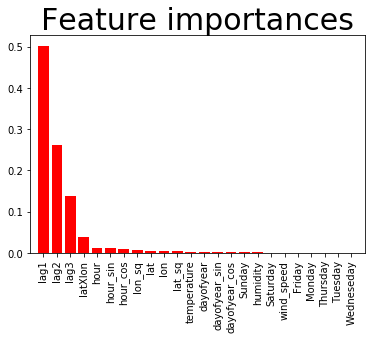

In [74]:
# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=30)
plt.bar(range(X15_mat.shape[1]), importances[indices],
      yerr=std[indices], color='r' , align="center")
plt.xticks(range(X15_mat.shape[1]), features_name[indices],rotation=90,fontsize = 10)
plt.xlim([-1, X15_mat.shape[1]])
plt.show()